Instituto Federal de Santa Catarina   
Curso de Engenharia Eletrônica   
Disciplina: Sistemas de Controle II   
Aluna: Jade Dutra Lopes

In [1]:
import numpy as np
import sympy as sp
import control                   
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

## Questão 2

In [2]:
A = np.matrix([[0, 1], [0, -2]])
B = np.matrix([[0], [1]])
C = np.matrix('1, 0')
D = 0
K = np.matrix('25 5')

#sistema de estados
G = control.ss(A,B,C,D)
G

StateSpace(array([[ 0.,  1.],
       [ 0., -2.]]), array([[0.],
       [1.]]), array([[1., 0.]]), array([[0.]]))

In [3]:
sys = control.ss2tf(G)
sys

TransferFunction(array([4.4408921e-16, 1.0000000e+00]), array([1., 2., 0.]))

C:\Users\zoy_r\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


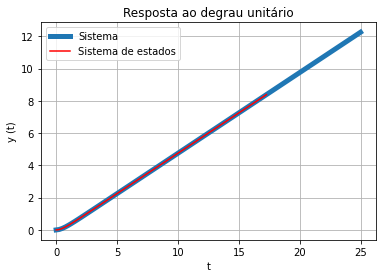

In [4]:
x, y = control.step_response(sys)
x2, y2 = control.step_response(G)
plt.figure()
plt.plot(x, y,  linewidth=5, label='Sistema')
plt.plot(x2, y2, 'r', label='Sistema de estados')
plt.title('Resposta ao degrau unitário')
plt.xlabel("t")
plt.ylabel("y (t)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
autovalores_planta, autovetores = linalg.eig(A);
polos_planta = autovalores_planta
polos_planta

array([ 0.+0.j, -2.+0.j])

### Observador de ordem mínima

In [6]:
# Matrizes reduzidas
Aaa = A[0,0]
Aab = A[0,1]
Aba = A[1,0]
Abb = A[1,1]

Ba = B[0,0]
Bb = B[1,0]

# Matriz de Controlabilidade do sistema dual para ordem mínima
Mc = control.ctrb(Aab,Abb)
Mc

# Teste de Controlabilidade
rank_Mc = np.linalg.matrix_rank(Mc) #número de postos do sistema
rank_Mc

1

In [7]:
L = -5*abs(polos_planta[1]);

# Ganho do observador
Ke = np.matrix([98])
Ke = Ke[0,0]      # Transformando em escalar

Achapeu = Abb-Ke*Aab;
Bchapeu = Achapeu*Ke+Aba-Ke*Aaa
Fchapeu = Bb-Ke*Ba;

Cchapeu = np.matrix('0;1');
Dchapeu = np.block([[1], [Ke]]);

print("L: " + str(L) + "\n")
print("Ke: " + str(Ke) + "\n")
print("Achapeu: " + str(Achapeu) + "\n")
print("Bchapeu: " + str(Bchapeu) + "\n")
print("Fchapeu: " + str(Fchapeu) + "\n")
print("Cchapeu: " + str(Cchapeu) + "\n")
print("Dchapeu: " + str(Dchapeu) + "\n")

L: -10.0

Ke: 98

Achapeu: -100

Bchapeu: -9800

Fchapeu: 1

Cchapeu: [[0]
 [1]]

Dchapeu: [[ 1]
 [98]]



### Equações recursivas

In [8]:
T = 0.01;
Fs = 1/T
tfinal = 5;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, int(Fs*tfinal))
u = np.ones(len(k));

# definindo os vetores
x1 = np.zeros(len(k));
x2 = np.zeros(len(k));
x1_ponto = np.zeros(len(k));
x2_ponto = np.zeros(len(k));
y = np.zeros(len(k));
eta1 = np.zeros(len(k));
eta1_ponto = np.zeros(len(k));
xtil1 = np.zeros(len(k));
xtil2 = np.zeros(len(k));

# condições iniciais (podem ser diferentes de zero)
x1[0] = 0;  #  para k = 0
x2[0] = 0;  #  para k = 0
x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
y[0] = C[0,0]*x1[0]+C[0,1]*x2[0]+D*u[0];  #  para k = 0
eta1[0] = 0;  #  para k = 0
eta1_ponto[0] = Fchapeu*u[0];  #  para k = 0

for j in range(1,Kmax-1):
    # sistema original
        # Equações dos integradores
        x1[j]=T*x1_ponto[j-1]+x1[j-1];
        x2[j]=T*x2_ponto[j-1]+x2[j-1];    
        
        # Equação diferencial de estados:  Xponto=A*X+B*U
        x1_ponto[j]=A[0,0]*x1[j]+A[0,1]*x2[j]+B[0]*u[j];  
        x2_ponto[j]=A[1,0]*x1[j]+A[1,1]*x2[j]+B[1]*u[j]; 

        # Equação de Saída: Y=C*X+D*U
        y[j] = C[0,0]*x1[j]+C[0,1]*x2[j]+D*u[j];

    # observador de ordem mínima
        # Equações dos integradores do observador
        eta1[j]=T*eta1_ponto[j-1]+eta1[j-1];
    
        # Equação diferencial de estados do observador
        eta1_ponto[j]=Achapeu*eta1[j]+Bchapeu*y[j]+Fchapeu*u[j];
    
    # Transformação
        # equação de saída do observador de ordem mínima
        xtil1[j]=Cchapeu[0,0]*eta1[j]+Dchapeu[0]*y[j];
        xtil2[j]=Cchapeu[1,0]*eta1[j]+Dchapeu[1]*y[j];

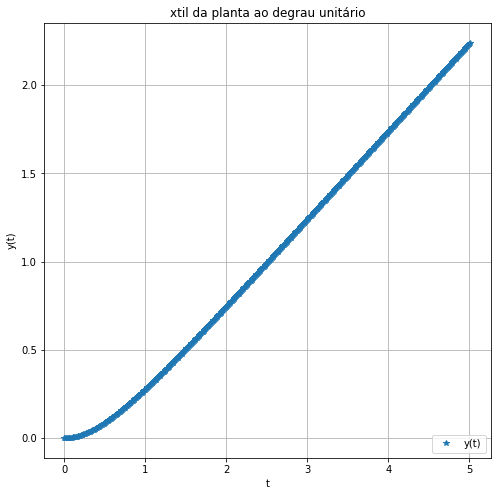

In [9]:
K = np.matrix([25,5])

fig, ((ax1) ) = plt.subplots(1, 1)
fig.set_size_inches(8,8)

ax1.plot(k*T,xtil1,'*')
ax1.set_title("xtil da planta ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("y(t)")
ax1.legend(['y(t)'],loc="lower right")
ax1.grid(True,'both')

## Controlador

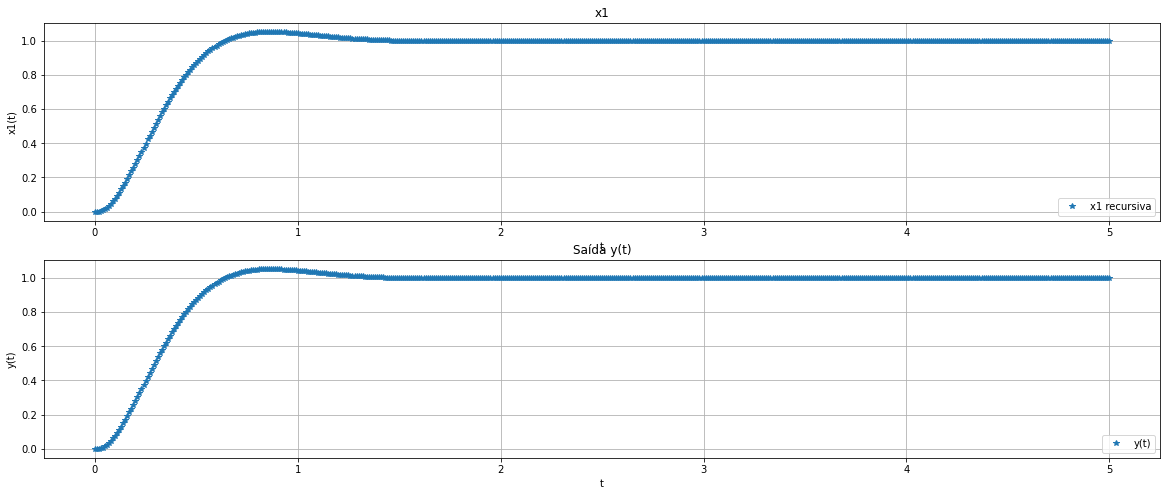

In [10]:
tfinal = 5;
Kmax = int((tfinal/T)+1);
t =np.linspace(0, tfinal, Kmax);
r = np.ones(int(len(t)));
csi = np.zeros(len(t));
u = np.zeros(len(t));

# Vetores de Estados
x1 = np.zeros(len(t));
x2 = np.zeros(len(t));
x1_ponto = np.zeros(len(t));
x2_ponto = np.zeros(len(t));

# Vetor de saída
y = np.zeros(len(t));

# Vetores do Observador
til_x1_rec = np.zeros(len(t));
til_x2_rec = np.zeros(len(t));
til_x1_ponto_rec = np.zeros(len(t));
til_x2_ponto_rec = np.zeros(len(t));
til_y = np.zeros(len(t));

erro_1 = np.zeros(len(t));
erro_2 = np.zeros(len(t));

## Condições iniciais

#csi_ponto[0] = r[0] - y[0]; 
csi[0] = r[0] - y[0]; 
u[j] = -(K[0,0]*x1[0] + K[0,1]*x2[0]) + K[0,0]*csi[0];
x1_ponto[0] = A[0,0]*x1[0] + A[0,1]*x2[0] + B[0]*u[0];
x2_ponto[0] = A[1,0]*x1[0] + A[1,1]*x2[0] + B[1]*u[0];
til_x1_ponto_rec[0]=B[0]*u[0];
til_x2_ponto_rec[0]=B[1]*u[0];

for j in range(1,len(t)):
    # Equações dos integradores
    x1[j] = T*x1_ponto[j-1] + x1[j-1];
    x2[j] = T*x2_ponto[j-1] + x2[j-1];    

    y[j] = C[0,0]*x1[j] + C[0,1]*x2[j]

    csi[j] = r[j] - y[j];
    
    # Lei de Controle
    u[j] = -(K[0,1]*x2[j]) + K[0,0]*csi[j];

    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
    x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j]; 

fig, ((ax1, ax2) ) = plt.subplots(2, 1)
fig.set_size_inches(20,8)

ax1.plot(t, x1, '*')
ax1.set_title("x1")
ax1.set_xlabel("t")
ax1.set_ylabel("x1(t)")
ax1.legend(['x1 recursiva','x~1 recursiva'],loc="lower right")
ax1.grid(True)

ax2.plot(t, y,'*')
ax2.set_title("Saída y(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("y(t)")
ax2.legend(['y(t)'],loc="lower right")
ax2.grid(True)

### Controlador e Observador

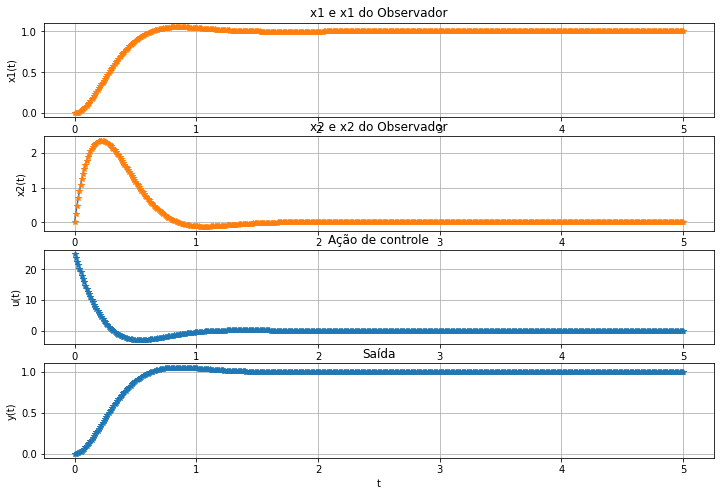

In [16]:
# vetores de estados
x1 = np.zeros(len(t));
x2 = np.zeros(len(t));
x1_ponto = np.zeros(len(t));
x2_ponto = np.zeros(len(t));
eta1 = np.zeros(len(t));
eta1_ponto = np.zeros(len(t));
xtil1 = np.zeros(len(t));
xtil2 = np.zeros(len(t));

# vetor de saída Y = C*X
y = np.zeros(len(t));

## Condições iniciais

y[0] = C[0,0]*x1[0] + C[0,1]*x2[0] + D*u[0];  #  para k = 0
#csi_ponto[0] = r[0] - y[0];
csi[0] = r[0] - y[0];
u[0] = -(K[0,1]*x2[0]) + K[0,0]*csi[0];
x1_ponto[0] = A[0,0]*x1[0] + A[0,1]*x2[0] + B[0]*u[0];
x2_ponto[0] = A[1,0]*x1[0] + A[1,1]*x2[0] + B[1]*u[0];
eta1[0] = 0;  #  para k = 0
eta1_ponto[0] = Fchapeu*u[0];  #  para k = 0

for j in range(1,len(t)):
    # Equações dos integradores
    x1[j] = T*x1_ponto[j-1] + x1[j-1];
    x2[j] = T*x2_ponto[j-1] + x2[j-1];   
    
    # observador de ordem mínima
    # Equações dos integradores do observador
    eta1[j] = T*eta1_ponto[j-1]+eta1[j-1];
    
    # Equação de Saída: Y=C*X+D*U
    y[j] = C[0,0]*x1[j] + C[0,1]*x2[j] + D*u[j];

    # Equação de erro
    csi[j] = r[j] - y[j];
    
        # Transformação
    # equação de saída do observador de ordem mínima
    xtil1[j] = Cchapeu[0,0]*eta1[j] + Dchapeu[0]*y[j];
    xtil2[j] = Cchapeu[1,0]*eta1[j] + Dchapeu[1]*y[j];


    
    # Equação da lei de controle
    u[j] = -(K[0,1]*xtil2[j]) + K[0,0]*csi[j];

    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
    x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j];
    
    # Equação diferencial de estados do observador
    eta1_ponto[j] = Achapeu*eta1[j] + Bchapeu*y[j] + Fchapeu*u[j];
    

fig, ((ax1, ax2,ax3,ax4) ) = plt.subplots(4, 1)
fig.set_size_inches(12,8)

ax1.plot(t, x1, t, xtil1,'*')
ax1.set_title("x1 e x1 do Observador")
ax1.set_xlabel("t")
ax1.set_ylabel("x1(t)")
ax1.grid(True)

ax2.plot(t, x2, t, xtil2,'*')
ax2.set_title("x2 e x2 do Observador")
ax2.set_xlabel("t")
ax2.set_ylabel("x2(t)")
ax2.grid(True)

ax3.plot(t, u,'*')
ax3.set_title("Ação de controle")
ax3.set_xlabel("t")
ax3.set_ylabel("u(t)")
ax3.grid(True)

ax4.plot(t, y,'*')
ax4.set_title("Saída")
ax4.set_xlabel("t")
ax4.set_ylabel("y(t)")
ax4.grid(True)